In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [35]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## with Regularization

In [37]:
df1 = pd.read_csv('USA_Housing.csv').to_numpy()
X, y = df1[:, 0:5], df1[:, 5]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
print(X_test[0])
print(y_test[0])

[66774.99581728588 5.717143201084843 7.795214820544994 4.32
 36788.98032695149]
1251688.6157028743


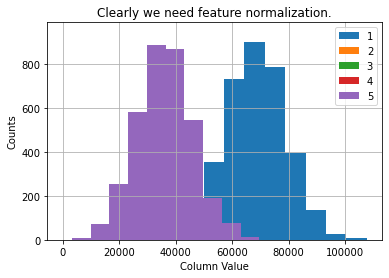

In [40]:
#Quick visualize data
plt.grid(True)
plt.hist(X_train[:,0],label = 'col1')
plt.hist(X_train[:,1],label = 'col2')
plt.hist(X_train[:,2],label = 'col3')
plt.hist(X_train[:,3],label = 'col4')
plt.hist(X_train[:,4],label = 'col5')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend(['1','2','3','4','5'])

Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    

In [41]:
def  featureNormalize(X):
   
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n = X.shape[1]

    for i in range(n):
        mu[i] = np.mean(X[:,i])
    for i in range(n):
        sigma[i] = np.std(X[:,i])
    for i in range(n):
        X_norm[:,i] = (X[:,i]-mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [42]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X_train)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [6.84405508e+04 5.97204457e+00 6.98243593e+00 3.96387714e+00
 3.61505825e+04]
Computed standard deviation: [1.05918067e+04 9.77720868e-01 1.00051237e+00 1.22978694e+00
 9.92283438e+03]


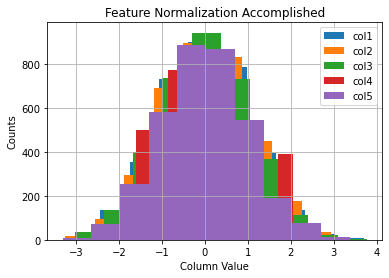

In [43]:
plt.grid(True)
#plt.xlim([-5,5])
dummy = plt.hist(X_norm[:,0],label = 'col1')
dummy = plt.hist(X_norm[:,1],label = 'col2')
dummy = plt.hist(X_norm[:,2],label = 'col3')
dummy = plt.hist(X_norm[:,3],label = 'col4')
dummy = plt.hist(X_norm[:,4],label = 'col5')



plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [44]:
#After the featureNormalize function is tested, we now add the intercept term to X_norm:

m = y_train.size
# Add intercept term to X
X_train_1 = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [45]:
X_train_1.shape

(3500, 6)

In [46]:
def computeCostMulti(X, y, theta):
    
    m = y.shape[0] # number of training examples
    
    J = 0
    J = (np.sum(np.square(np.dot(X,theta)-y)))/(2*m)
    
    return J

In [47]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    m = y.shape[0] # number of training examples
    
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha/m)*(np.dot(X.transpose(),(np.dot(X,theta)-y)))
        
        
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [1228189.9612082806 228969.15822469429 161538.83450802596
 121448.55801090124 1640.7924457536496 151078.5912243163]


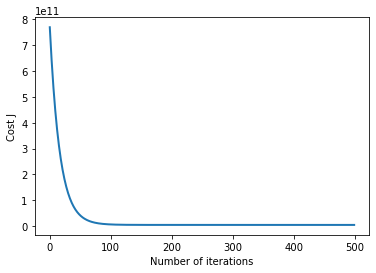

In [48]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 500

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X_train_1, y_train, theta, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

price = 0  
price = theta[0]*1 + theta[1]*((66774.99581728588-mu[0])/sigma[0]) + theta[2]*((5.717143201084843-mu[1])/sigma[1])\
    +theta[3]*((7.795214820544994-mu[2])/sigma[2])+theta[4]*((4.32-mu[3])/sigma[3])+theta[5]*((36788.98032695149-mu[4])/sigma[4])



In [49]:
X_test[0]

array([66774.99581728588, 5.717143201084843, 7.795214820544994, 4.32,
       36788.98032695149], dtype=object)

In [50]:

print('Predicted price of the first X_test with y_test of $1251688.6157028743: ${:.0f}'.format(price))


Predicted price of the first X_test with y_test of $1251688.6157028743: $1258925


### with Normal Equations

In [51]:
m = y_train.size
# Add intercept term to X
X_train_2 = np.concatenate([np.ones((m, 1)), X_train], axis=1).astype(float)
y_train_2 = y_train.reshape(len(y_train),1).astype(float)

In [52]:
from numpy.linalg import inv
def normalEqn(X, y):
    
    #theta = np.zeros(X.shape[1])
    
    x_tr=X.T
    theta=np.dot(inv(np.dot(x_tr,X)),(np.dot(x_tr,y)))

    
    return theta

In [53]:
theta = normalEqn(X_train_2, y_train_2);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)
price = float(h(theta,[1,66774.99581728588, 5.717143201084843, 7.795214820544994, 4.32,36788.98032695149])) # You should change this


print('Predicted price of the first X_test with y_test of $1251688.6157028743: ${:.0f}'.format(price))


Theta computed from the normal equations: [[-2.64137267e+06]
 [ 2.16176350e+01]
 [ 1.65221120e+05]
 [ 1.21405377e+05]
 [ 1.31871878e+03]
 [ 1.52251955e+01]]
Predicted price of the first X_test with y_test of $1251688.6157028743: $1258935


In [54]:
X_train_2[0]

array([1.00000000e+00, 8.66908733e+04, 6.25990093e+00, 6.67626537e+00,
       3.23000000e+00, 4.25896244e+04])

### for finding Error:


In [55]:
m = y_test.size
# Add intercept term to X
X_test_2 = np.concatenate([np.ones((m, 1)), X_test], axis=1).astype(float)
y_test_2 = y_test.reshape(len(y_test),1).astype(float)

In [56]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

In [57]:
theta = normalEqn(X_train_2,y_train_2)
m = y_test.size
y_tst=[]
er=[]
pred=[]
for i in range(y_test_2.shape[0]):
    
    for index,j in enumerate(X_test_2[i]):
        y=y_test_2[index][0]
        y_tst.append(y)
        p=float(h(theta,[X_test_2[index][0],X_test_2[index][1],X_test_2[index][2],X_test_2[index][3],
        X_test_2[index][4],X_test_2[index][5]]))
        pred.append(p)
        er.append((y-p)**2)
        
MSE=1/m*sum(er)
        
print(MSE)

22334151559.11668


In [58]:
df = pd.DataFrame(list(zip(y_tst,pred)),
               columns =['y_test', 'predict'])
df

,y_test,predict
0,1.251689e+06,1.258935e+06
1,8.730483e+05,8.226946e+05
2,1.696978e+06,1.742214e+06
3,1.063964e+06,9.729370e+05
4,9.487883e+05,9.945460e+05
...,...,...
8995,8.730483e+05,8.226946e+05
8996,1.696978e+06,1.742214e+06
8997,1.063964e+06,9.729370e+05
8998,9.487883e+05,9.945460e+05


In [59]:
print('MAE:', metrics.mean_absolute_error(y_tst, pred))
print('MSE:', metrics.mean_squared_error(y_tst, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_tst, pred)))

MAE: 54196.50033021232
MSE: 3722358593.1858964
RMSE: 61011.134993424734


### with Sklearn libraries


In [60]:
lm = LinearRegression()
lm.fit(X_train[:,1:],y_train)

LinearRegression()

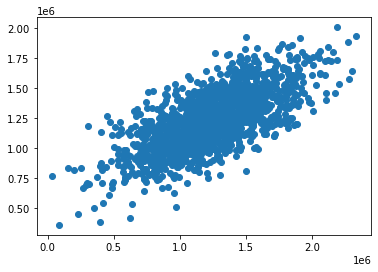

In [61]:
predictions = lm.predict(X_test[:,1:])
plt.scatter(y_test,predictions)

In [62]:
np.array([list(X_test[0,1:])])

array([[5.71714320e+00, 7.79521482e+00, 4.32000000e+00, 3.67889803e+04]])

In [63]:

price=lm.predict(np.array([list(X_test[0,1:])]))
print(f'Predicted price of the first X_test with y_test of $1251688.6157028743: {price}')

Predicted price of the first X_test with y_test of $1251688.6157028743: [1291397.14243162]


In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 200719.38956882452
MSE: 64083459568.469376
RMSE: 253147.11052759297
